In [13]:
import matplotlib.pyplot as plt
import numpy as np
from CA_model import CA_model
import evaluation
import iceing
import scipy.stats as stats
from skimage.transform import resize

In [4]:
iceing_test = iceing.iceing_model(0.45, 1000)

In [5]:
ponds, sums = iceing_test.run(15_000_000)

In [6]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

In [25]:
# replacement for CA model
size = 1000
h_norm = np.random.normal(loc = 0.5, scale = 1, size = (int(size/3), int(size/3)))
h_norm = resize(h_norm, (size, size))
h_norm = np.heaviside(h_norm-0.6, 0) * h_norm

areas_norm, perimeters_norm = evaluation.perim_area(np.where(h_norm>0, -1, 1), pond_val = -1, ice_val = 1)
shapes_norm= np.log(areas_norm)/np.log(perimeters_norm)

In [26]:
shapes_ising = np.log(areas_ising)/np.log(perimeters_ising)

In [28]:
stats.ks_2samp(np.log(areas_norm),np.log(areas_ising))

KstestResult(statistic=0.19889886540499363, pvalue=1.633583796504058e-85, statistic_location=1.0986122886681098, statistic_sign=1)

In [32]:
stats.permutation_test((shapes_ising,shapes_norm),statistic=stats.ttest_ind)

TypeError: can't multiply sequence by non-int of type 'float'

Text(0, 0.5, 'perimeter [m]')

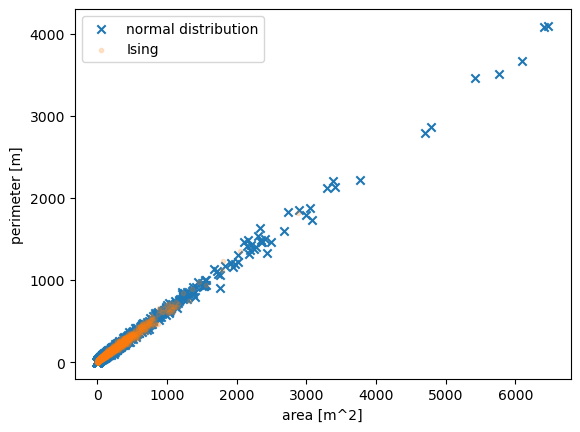

In [24]:
plt.figure()
plt.scatter(areas_norm, perimeters_norm, marker='x', label = 'normal distribution')
plt.scatter(areas_ising, perimeters_ising, marker='.', alpha=0.2, label = 'Ising')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')